# Importing packages that we will use in this project

In [3]:
using Pkg
Pkg.add(["StatsBase","Statistics","StatsModels","ClassImbalance","ROCAnalysis","CSV","DataFrames"])

   Resolving package versions...
    Updating `C:\Users\rpras\.julia\environments\v1.6\Project.toml`
  [3eaba693] + StatsModels v0.6.21
  [10745b16] + Statistics
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Manifest.toml`


In [4]:
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")

   Resolving package versions...
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Manifest.toml`


In [5]:
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Manifest.toml`


In [8]:
Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\rpras\.julia\environments\v1.6\Manifest.toml`


# Activating the imported packages 

In [9]:
using Lathe
using GLM
using StatsPlots
using MLBase
using CSV
using DataFrames
using StatsBase
using Statistics
using StatsModels
using ClassImbalance
using ROCAnalysis
using Plots
using StatsPlots

# Enabling columns value for larger number of columns

In [7]:
ENV["COLUMNS"]=1000

1000

# Importing the .csv file and convering it into a dataframe

In [15]:
data=DataFrame(CSV.File("Churn_Modelling.csv", normalizenames=true))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,Int64,Int64,String,Int64,String,String,Int64,Int64,Float64,Int64,Int64,Int64,Float64,Int64
1,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,1.01349e5,1
2,2,15647311,Hill,608,Spain,Female,41,1,83807.9,1,0,1,1.12543e5,0
3,3,15619304,Onio,502,France,Female,42,8,1.59661e5,3,1,0,1.13932e5,1
4,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.6,0
5,5,15737888,Mitchell,850,Spain,Female,43,2,1.25511e5,1,1,1,79084.1,0
6,6,15574012,Chu,645,Spain,Male,44,8,1.13756e5,2,1,0,1.49757e5,1
7,7,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.8,0
8,8,15656148,Obinna,376,Germany,Female,29,4,1.15047e5,4,1,0,1.19347e5,1
9,9,15792365,He,501,France,Male,44,4,1.42051e5,2,0,1,74940.5,0


In [13]:
names(data)

14-element Vector{Symbol}:
 :RowNumber
 :CustomerId
 :Surname
 :CreditScore
 :Geography
 :Gender
 :Age
 :Tenure
 :Balance
 :NumOfProducts
 :HasCrCard
 :IsActiveMember
 :EstimatedSalary
 :Exited

In [14]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,RowNumber,5000.5,1,5000.5,10000,,,Int64
2,CustomerId,1.56909e7,15565701,1.56907e7,15815690,,,Int64
3,Surname,,Abazu,,Zuyeva,2932,,String
4,CreditScore,650.529,350,652.0,850,,,Int64
5,Geography,,France,,Spain,3,,String
6,Gender,,Female,,Male,2,,String
7,Age,38.9218,18,37.0,92,,,Int64
8,Tenure,5.0128,0,5.0,10,,,Int64
9,Balance,76485.9,0.0,97198.5,2.50898e5,,,Float64


# Dropping the columns which are not useful for the model

In [18]:
data=data[:,Not(:CustomerId)]
data=data[:,Not(:Surname)]

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,Int64,Int64,String,String,Int64,Int64,Float64,Int64,Int64,Int64,Float64,Int64
1,1,619,France,Female,42,2,0.0,1,1,1,1.01349e5,1
2,2,608,Spain,Female,41,1,83807.9,1,0,1,1.12543e5,0
3,3,502,France,Female,42,8,1.59661e5,3,1,0,1.13932e5,1
4,4,699,France,Female,39,1,0.0,2,0,0,93826.6,0
5,5,850,Spain,Female,43,2,1.25511e5,1,1,1,79084.1,0
6,6,645,Spain,Male,44,8,1.13756e5,2,1,0,1.49757e5,1
7,7,822,France,Male,50,7,0.0,2,1,1,10062.8,0
8,8,376,Germany,Female,29,4,1.15047e5,4,1,0,1.19347e5,1
9,9,501,France,Male,44,4,1.42051e5,2,0,1,74940.5,0


# Box graph
Also known as whisker plot. In this graph we draw a box plot from first quartile to third quartile of the data set.
A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

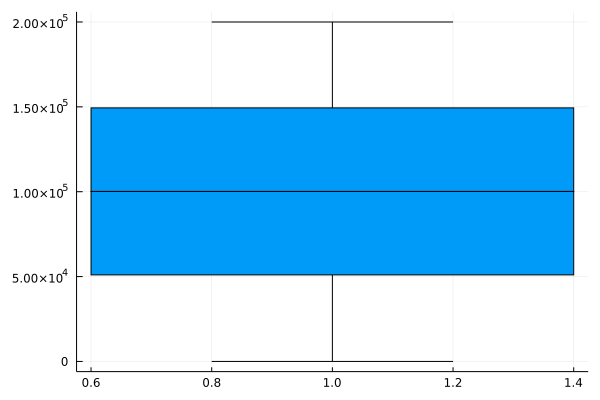

In [20]:
boxplot(data.EstimatedSalary,legend=false)

# Density graph

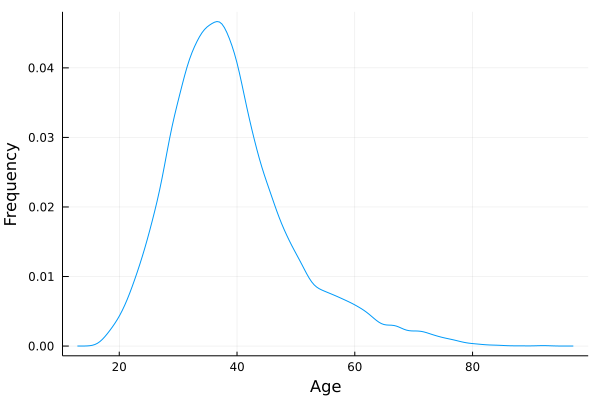

In [21]:
density(data.Age,ylabel="Frequency",xlabel="Age",legend=false)

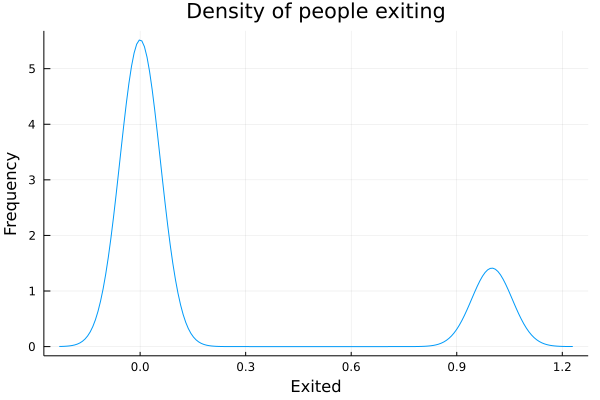

In [23]:
density(data.Exited,ylabel="Frequency",xlabel="Exited",legend=false,title="Density of people exiting")

# scatter plot
scatter plot is nothing but a dot graph which is used to observe and visually display relationship between variables.

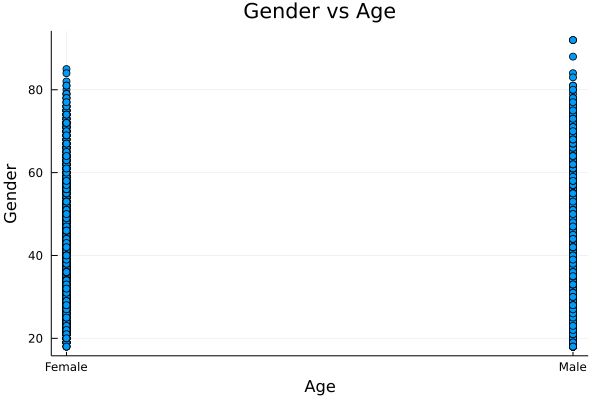

In [25]:
train_plot=scatter(data.Gender,data.Age,ylabel="Gender",xlabel="Age",title="Gender vs Age",legend=false)

In [26]:
println("correlation of Estimated Salary with Balance is:", cor(data.Balance,data.EstimatedSalary))

correlation of Estimated Salary with Balance is:0.012797496340555667


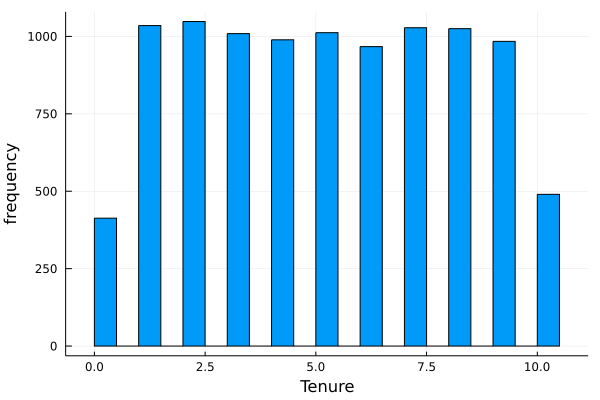

In [29]:
histogram(data.Tenure,xlabel="Tenure",ylabel="frequency",legend=false)

# OneHotEncoding
One hot encoding is a process of converting categorical variables into a form (numerical columns) that could be fed into ML algorithms to do a better job in prediction.

In [31]:
Lathe.preprocess.OneHotEncode(data,:Geography)
Lathe.preprocess.OneHotEncode(data,:Gender)

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Spain,Germany,Female,Male
,Int64,Int64,String,String,Int64,Int64,Float64,Int64,Int64,Int64,Float64,Int64,Bool,Bool,Bool,Bool,Bool
1,1,619,France,Female,42,2,0.0,1,1,1,1.01349e5,1,1,0,0,1,0
2,2,608,Spain,Female,41,1,83807.9,1,0,1,1.12543e5,0,0,1,0,1,0
3,3,502,France,Female,42,8,1.59661e5,3,1,0,1.13932e5,1,1,0,0,1,0
4,4,699,France,Female,39,1,0.0,2,0,0,93826.6,0,1,0,0,1,0
5,5,850,Spain,Female,43,2,1.25511e5,1,1,1,79084.1,0,0,1,0,1,0
6,6,645,Spain,Male,44,8,1.13756e5,2,1,0,1.49757e5,1,0,1,0,0,1
7,7,822,France,Male,50,7,0.0,2,1,1,10062.8,0,1,0,0,0,1
8,8,376,Germany,Female,29,4,1.15047e5,4,1,0,1.19347e5,1,0,0,1,1,0
9,9,501,France,Male,44,4,1.42051e5,2,0,1,74940.5,0,1,0,0,0,1


# TrainTestSplit
This is used to split dataset into subsets named train and test

In [33]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(data,.75)

(7501×17 typename(DataFrame)
│ Row  │ RowNumber │ CreditScore │ Geography │ Gender │ Age   │ Tenure │ Balance   │ NumOfProducts │ HasCrCard │ IsActiveMember │ EstimatedSalary │ Exited │ France │ Spain │ Germany │ Female │ Male │
│      │ Int64     │ Int64       │ String    │ String │ Int64 │ Int64  │ Float64   │ Int64         │ Int64     │ Int64          │ Float64         │ Int64  │ Bool   │ Bool  │ Bool    │ Bool   │ Bool │
├──────┼───────────┼─────────────┼───────────┼────────┼───────┼────────┼───────────┼───────────────┼───────────┼────────────────┼─────────────────┼────────┼────────┼───────┼─────────┼────────┼──────┤
│ 1    │ 1         │ 619         │ France    │ Female │ 42    │ 2      │ 0.0       │ 1             │ 1         │ 1              │ 1.01349e5       │ 1      │ 1      │ 0     │ 0       │ 1      │ 0    │
│ 2    │ 2         │ 608         │ Spain     │ Female │ 41    │ 1      │ 83807.9   │ 1             │ 0         │ 1              │ 1.12543e5       │ 0      │ 0      │ 1    

In [34]:
fm = @formula(Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + Female + France + Spain)
logit = glm(fm, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Exited ~ 1 + CreditScore + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + Female + France + Spain

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                        Coef.  Std. Error       z  Pr(>|z|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)      -1.78198      0.166191    -10.72    <1e-26  -2.10771      -1.45625
CreditScore      -0.000389416  0.00018213   -2.14    0.0325  -0.000746385  -3.24469e-5
Age               0.0414225    0.00169672   24.41    <1e-99   0.038097      0.044748
Tenure           -0.00630735   0.00610973   -1.03    0.3019  -0.0182822     0.00566749
Balance           1.46036e-6

In [35]:
prediction = predict(logit,test)

2499-element Vector{Union{Missing, Float64}}:
 0.3308741112364187
 0.2426253673726099
 0.17819785174794528
 0.26752976678520557
 0.26355344406914905
 0.0226560023215345
 0.05227667058873162
 0.08849911119670506
 0.13998103206363055
 0.029811805549608203
 0.06185819553055583
 0.043835036785002945
 0.0351100096550426
 ⋮
 0.29875601042815636
 0.07597042698702527
 0.0998782104917182
 0.018815820979072962
 0.38991290035058157
 0.5057222969979653
 0.14188300526300357
 0.38641255386465057
 0.2292664774526626
 0.2775042186735995
 0.06536333663211381
 0.12685385924828904

In [36]:
prediction_class = [if x < 0.5 0 else 1 end for x in prediction];

prediction_df = DataFrame(y_actual = test.Exited, y_predicted = prediction_class, prob_predicted = prediction);
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted

2499-element BitVector:
 0
 1
 1
 0
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 0
 1
 1
 0
 1
 1
 1

# Accuracy
The Accuracy of a model is the total number of classes predicted correctly by the model.

In [37]:
accuracy = mean(prediction_df.correctly_classified)

0.8171268507402961